In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import matplotlib
import seaborn as sns
from matplotlib import colormaps as cm

dt = 0.03136454464284435

# Plot timeseries in 3d

## For the ones predicted correctly in timeseires 

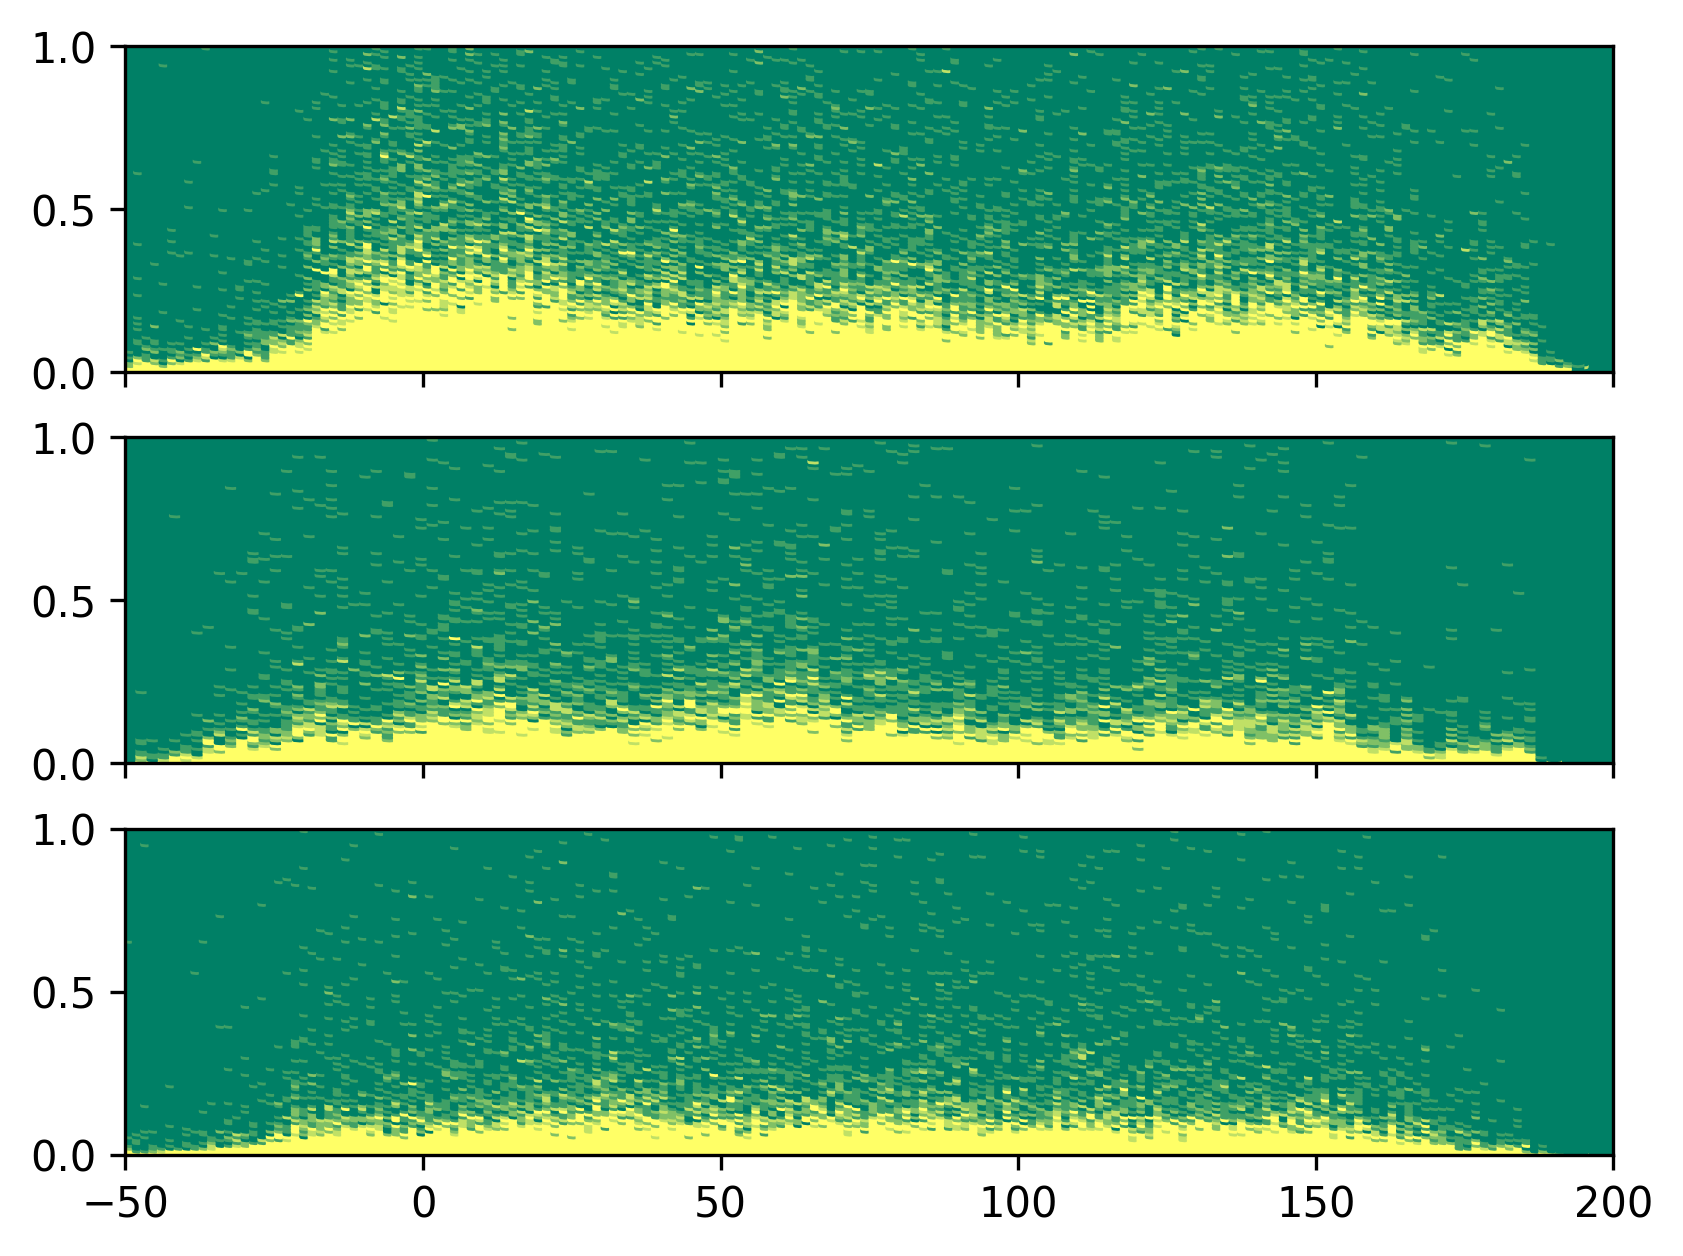

In [7]:
# Try Kernel Density Plot
fig, axs = plt.subplots(3, sharex=True, dpi=300)
sel = np.load(f"Data/both_preds.npy")


def normalize(array):
    return (array - array.min()) / (array.max() - array.min())


for i in range(3):
    # load all data
    pregm2 = np.load(f"Data/ExplainedGradients/prepeakgm_{i}.npy")
    postgm2 = np.load(f"Data/ExplainedGradients/postpeakgm_{i}.npy")
    pre2 = np.load(f"Data/ExplainedGradients/prepeakshap_{i}.npy")
    post2 = np.load(f"Data/ExplainedGradients/postpeakshap_{i}.npy")
    currHaz = np.abs(np.hstack([pre2, post2]))
    currHaz[currHaz > 1.0] = 1.0
    currHaz[currHaz < -1.0] = -1.0
    currHaz = np.nan_to_num(currHaz, 0)
    currHaz = currHaz[sel]
    timepre = np.arange(-pre2.shape[1], 0, 1) * dt * 30
    timepost = np.arange(0, post2.shape[1], 1) * dt * 30
    time = np.hstack([timepre, timepost])
    axs[i].hexbin(
        x=np.repeat(time, currHaz.shape[0], axis=0),
        y=np.ma.masked_where(currHaz == 0, currHaz).swapaxes(0, 1).flatten(),
        vmax=5,
        gridsize=200,
        cmap="summer",
    )
    # sns.kdeplot(
    #  x=np.repeat(time,currHaz.shape[0],axis=0), y=np.ma.masked_where(currHaz == 0, currHaz).swapaxes(0, 1).flatten(), fill=True,)
    axs[i].set_xlim(-50, 200)
    axs[i].set_ylim(0, 1.0)
    axs[i].set_facecolor(cm["summer"](0))
plt.savefig("Plots/correct_tsv5.png", dpi=500)
plt.show()

## for the ones predicted correctly in both

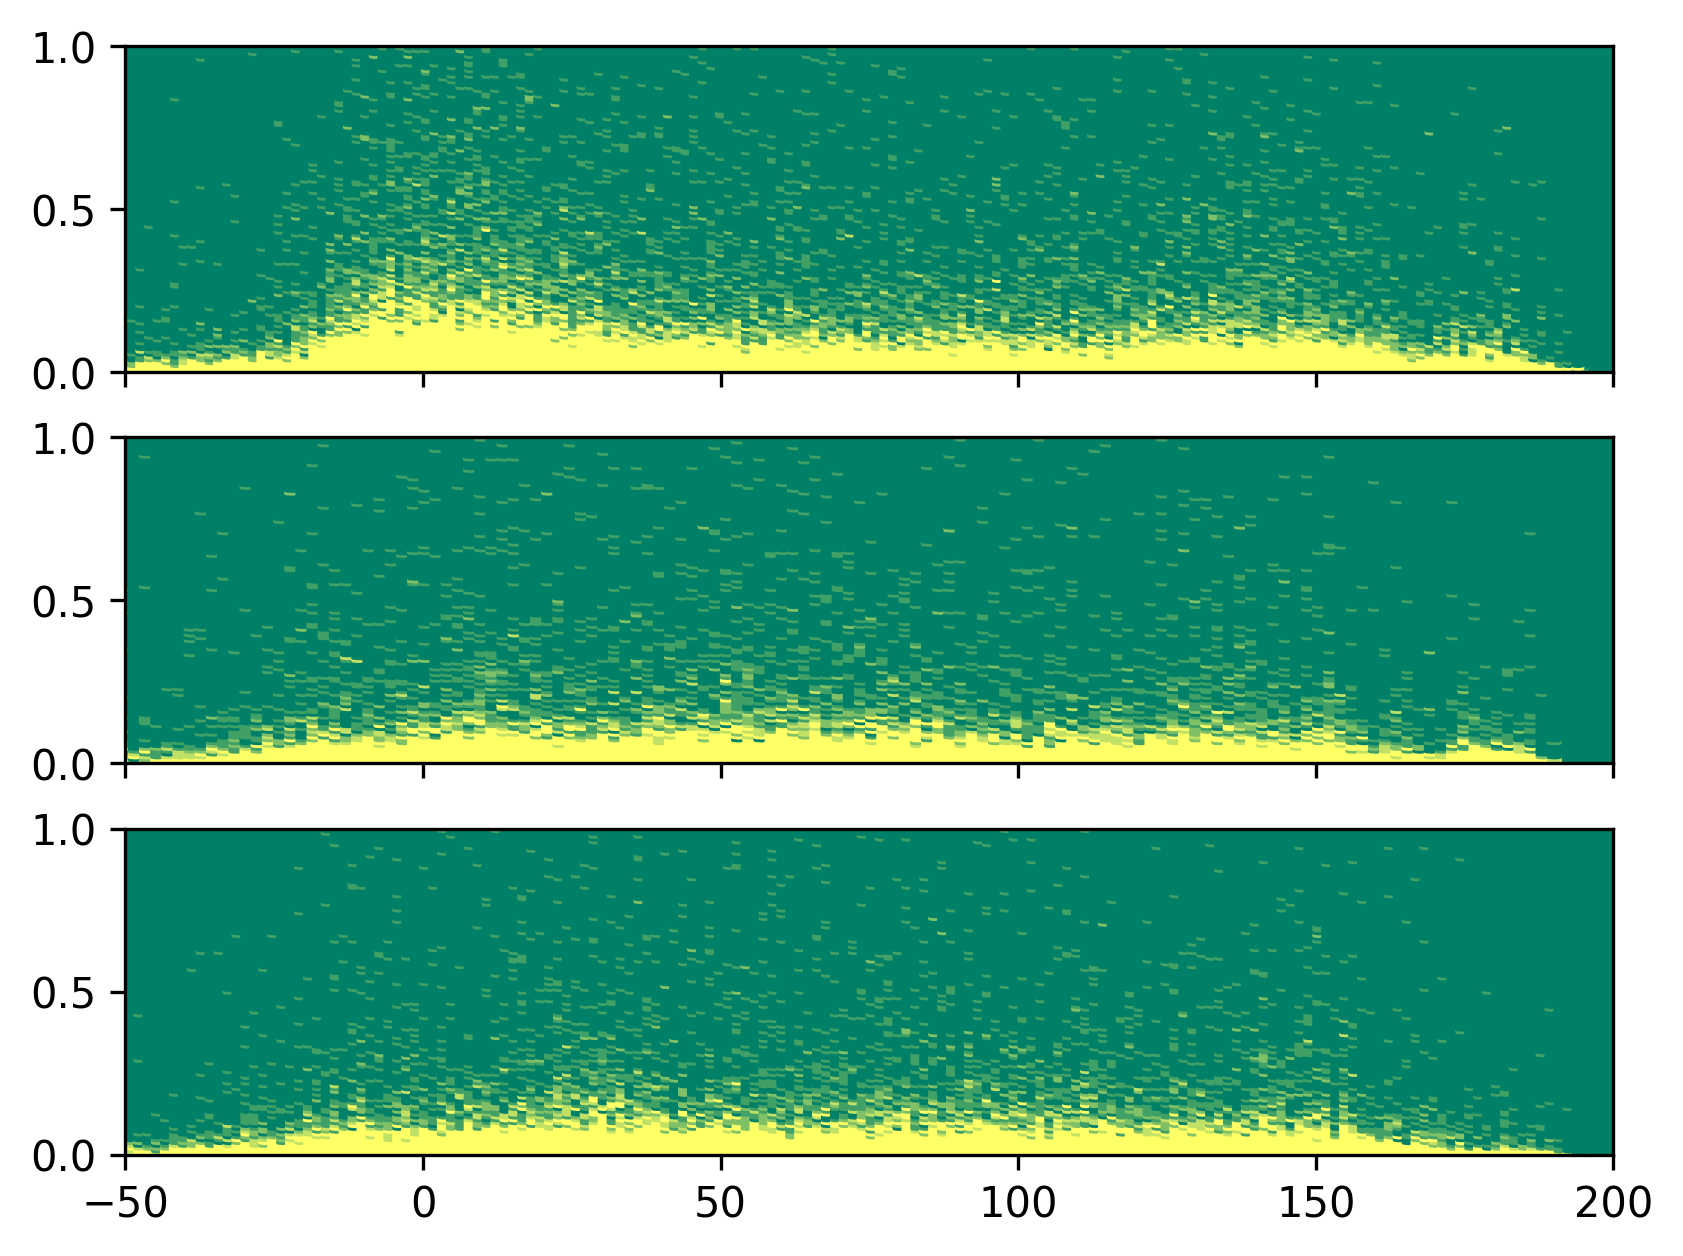

In [8]:
# Try Kernel Density Plot
fig, axs = plt.subplots(3, sharex=True, dpi=300)
sel = np.load(f"Data/changed_preds.npy")


def normalize(array):
    return (array - array.min()) / (array.max() - array.min())


for i in range(3):
    # load all data
    pregm2 = np.load(f"Data/ExplainedGradients/prepeakgm_{i}.npy")
    postgm2 = np.load(f"Data/ExplainedGradients/postpeakgm_{i}.npy")
    pre2 = np.load(f"Data/ExplainedGradients/prepeakshap_{i}.npy")
    post2 = np.load(f"Data/ExplainedGradients/postpeakshap_{i}.npy")
    currHaz = np.abs(np.hstack([pre2, post2]))
    currHaz[currHaz > 1.0] = 1.0
    currHaz[currHaz < -1.0] = -1.0
    currHaz = np.nan_to_num(currHaz, 0)
    currHaz = currHaz[sel]
    timepre = np.arange(-pre2.shape[1], 0, 1) * dt * 30
    timepost = np.arange(0, post2.shape[1], 1) * dt * 30
    time = np.hstack([timepre, timepost])
    axs[i].hexbin(
        x=np.repeat(time, currHaz.shape[0], axis=0),
        y=np.ma.masked_where(currHaz == 0, currHaz).swapaxes(0, 1).flatten(),
        vmax=5,
        gridsize=200,
        cmap="summer",
    )
    # sns.kdeplot(
    #  x=np.repeat(time,currHaz.shape[0],axis=0), y=np.ma.masked_where(currHaz == 0, currHaz).swapaxes(0, 1).flatten(), fill=True,)
    axs[i].set_xlim(-50, 200)
    axs[i].set_ylim(0, 1.0)
    axs[i].set_facecolor(cm["summer"](0))
plt.savefig("Plots/correct_bothv5.png", dpi=500)
plt.show()

# Individual plots

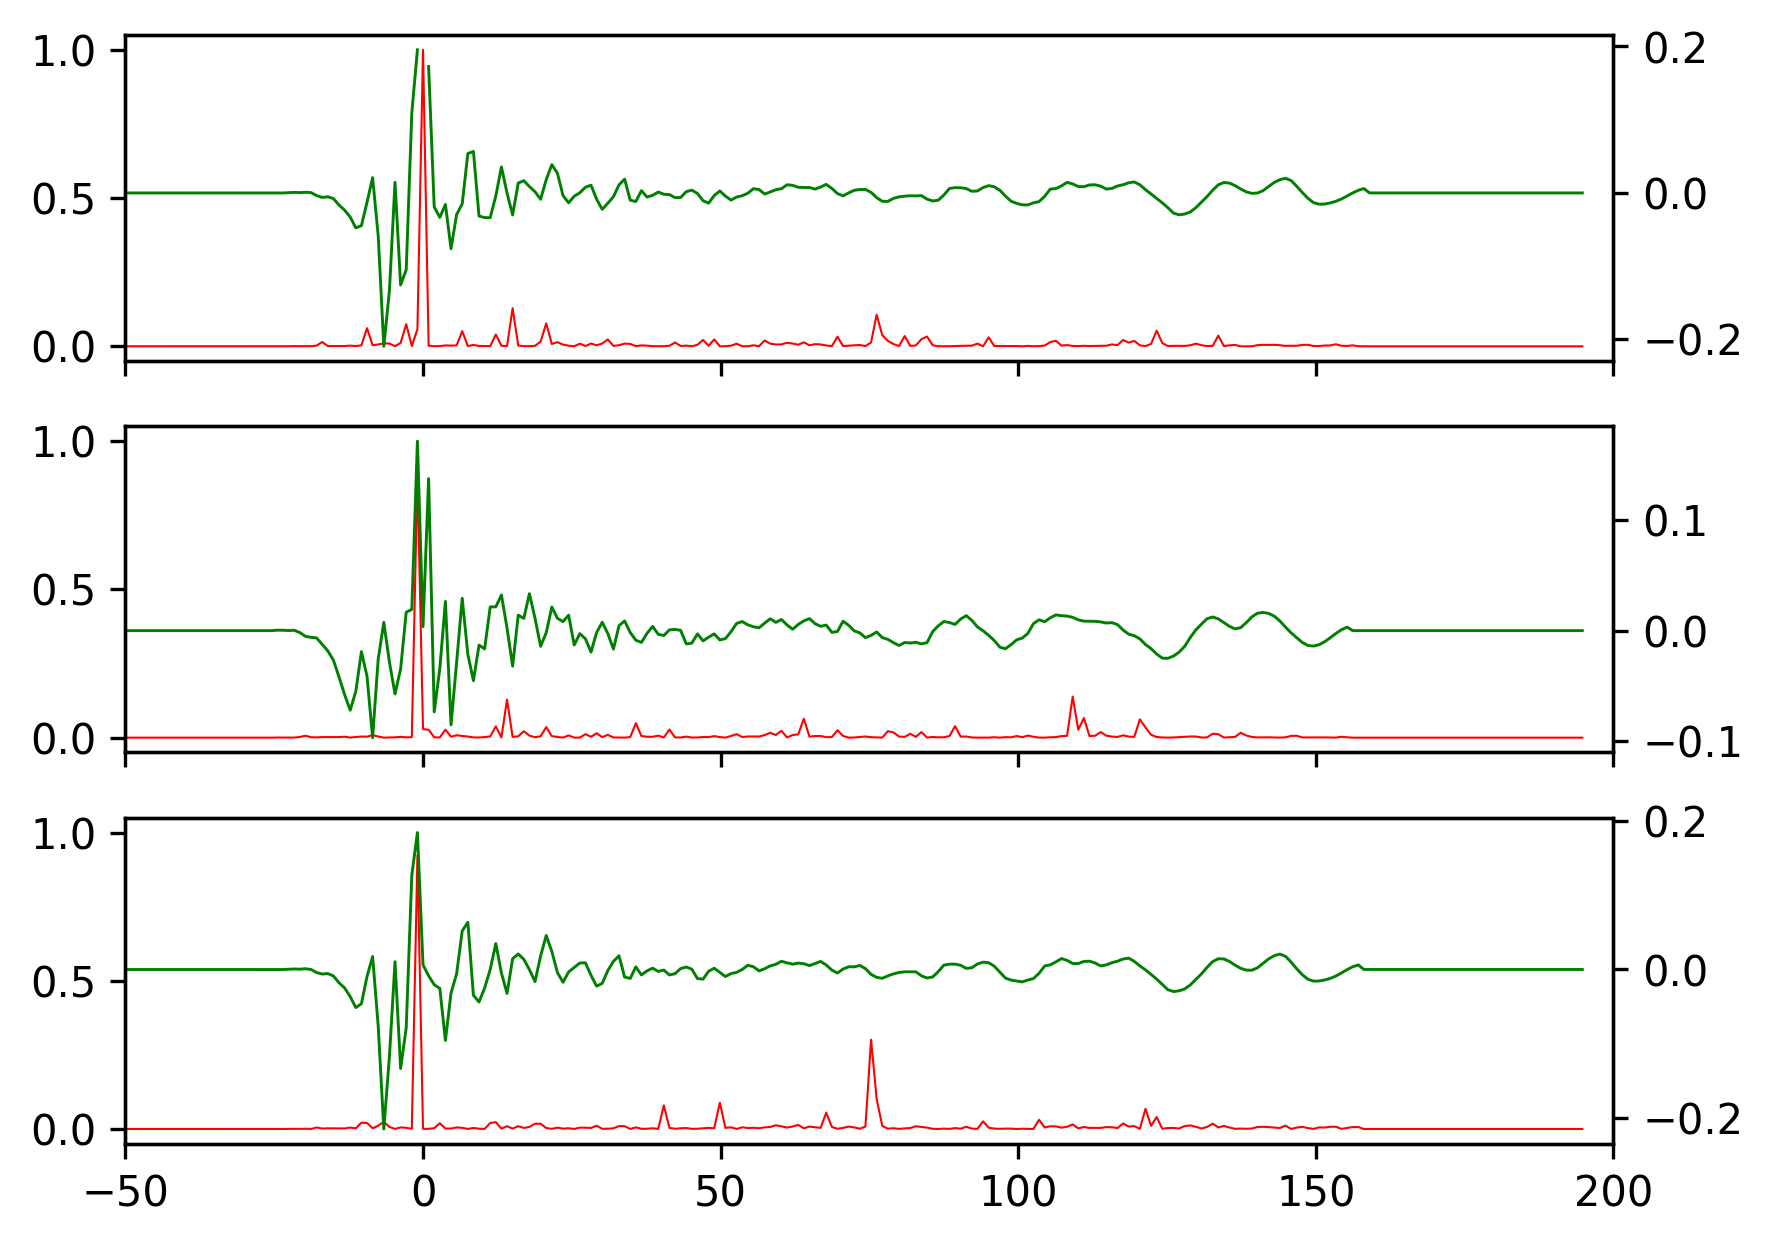

In [35]:
# %matplotlib widget
sel = np.load(f"Data/both_preds.npy")
fig, axs = plt.subplots(3, sharex=True, dpi=300, sharey=True)

r = [430, 250, 444]


def normalize(array):
    return (array - array.min()) / (array.max() - array.min())


for i in range(3):
    # load all data
    pregm2 = np.load(f"Data/ExplainedGradients/prepeakgm_{0}.npy")
    postgm2 = np.load(f"Data/ExplainedGradients/postpeakgm_{0}.npy")
    pre2 = np.load(f"Data/ExplainedGradients/prepeakshap_{0}.npy")
    post2 = np.load(f"Data/ExplainedGradients/postpeakshap_{0}.npy")
    currHaz = np.abs(np.hstack([pre2, post2]))[sel][r[i]]
    gm = np.hstack([pregm2, postgm2])[sel][r[i]]
    bothscore = np.abs(np.hstack([pre2, post2]))[sel]
    currHaz[currHaz > 1.0] = 1.0
    currHaz[currHaz < -1.0] = -1.0
    currHaz = np.nan_to_num(currHaz, 0)
    # currHaz=currHaz[sel]

    timepre = np.arange(-pre2.shape[1], 0, 1) * dt * 30
    timepost = np.arange(0, post2.shape[1], 1) * dt * 30
    time = np.hstack([timepre, timepost])

    axs[i].plot(time, currHaz, color="red", linewidth=0.5)
    axt = axs[i].twinx()
    # axt.plot(time, np.ma.masked_where(currHaz ==0, currHaz).mean(axis=0), color="red", linewidth=1.0)
    # axt.plot(time,
    #     np.percentile(np.ma.masked_where(currHaz ==0, currHaz), 5, axis=0), color="green", linewidth=0.7
    # )
    axt.plot(time, gm, color="green", linewidth=0.7)
    axs[i].set_xlim(-50, 200)
    # axt.set_ylim(-0.5,0.5)
    # axs[i].set_ylim(0,1.0)
    # axs[i].twinx().plot(np.hstack([np.nan_to_num(pregm2,0),np.nan_to_num(postgm2,0)]).mean(axis=0),color='r')

plt.savefig("Plots/both_true_one_case.pdf", dpi=500)
plt.show()

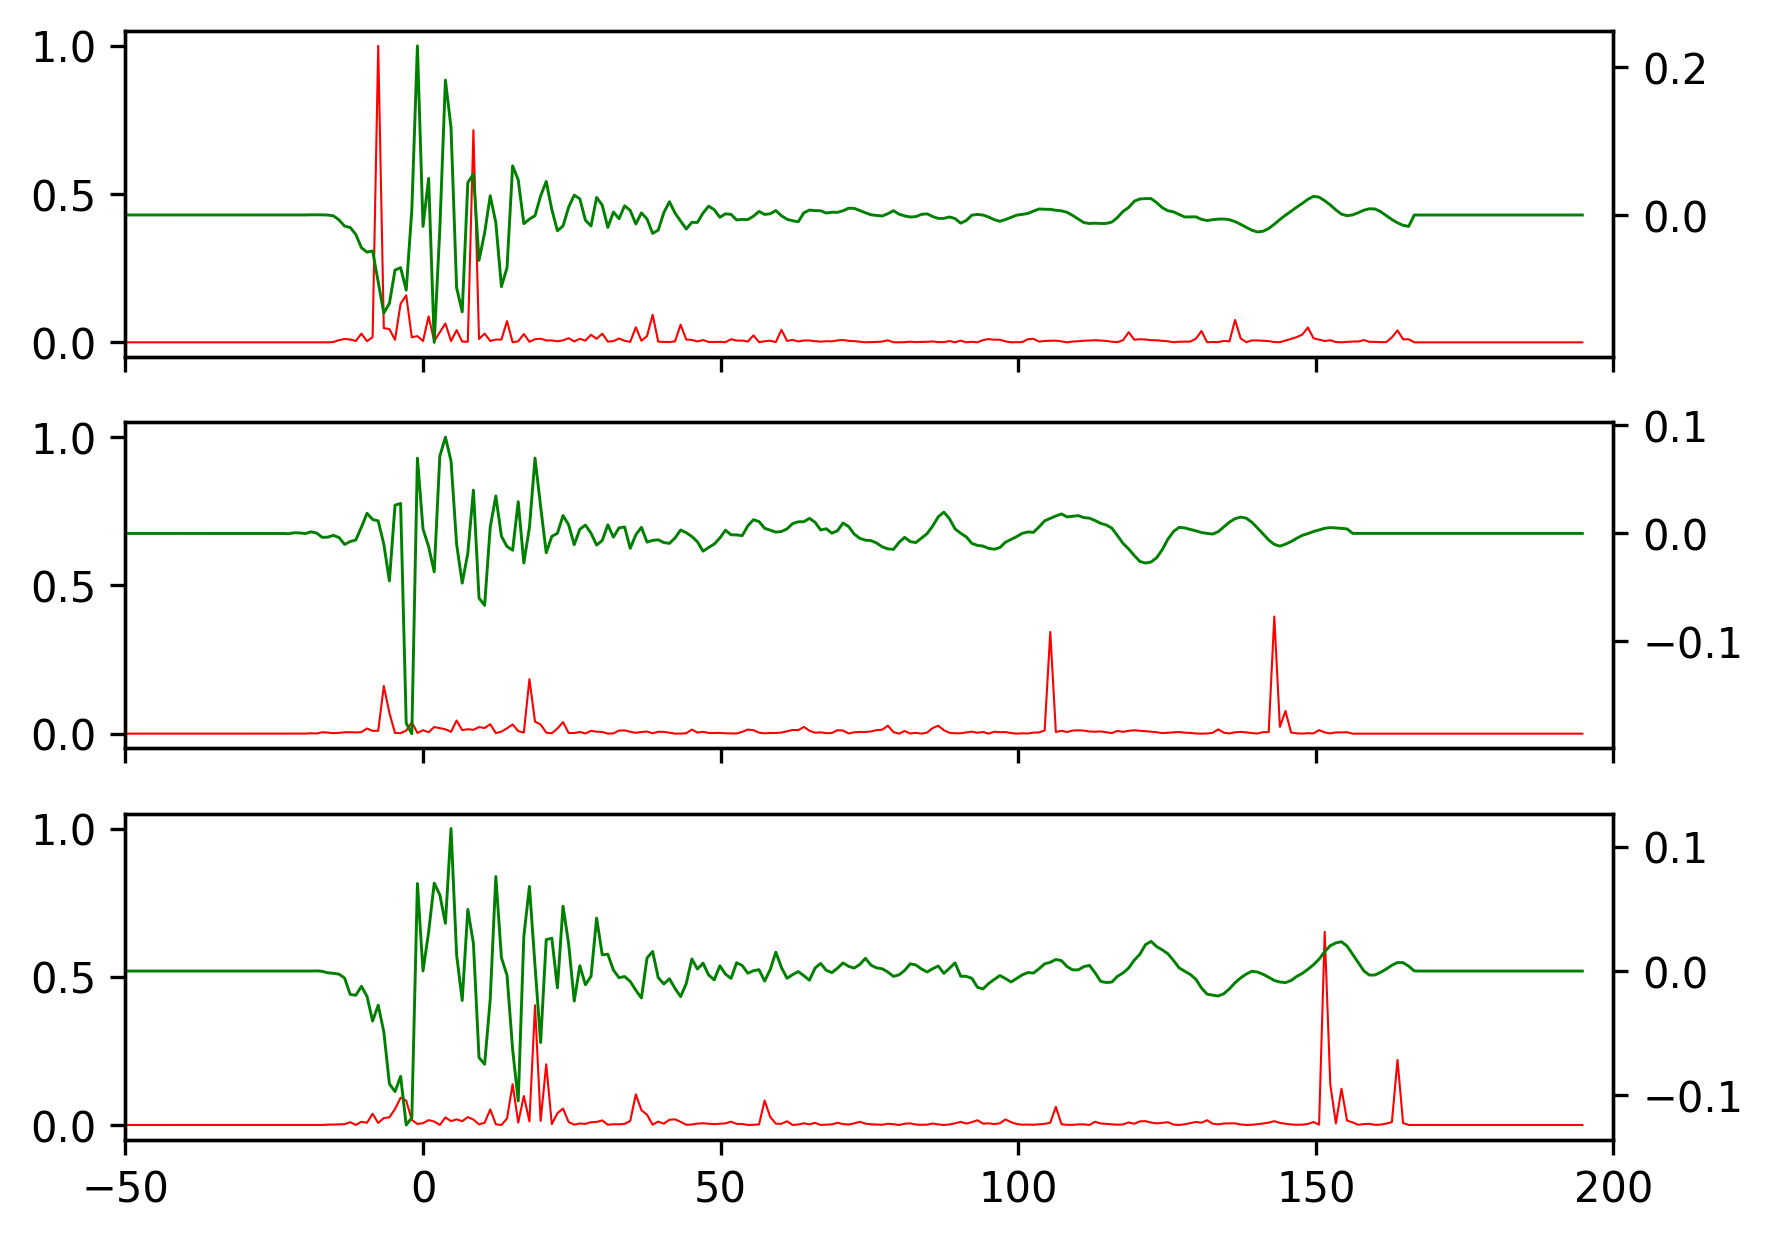

In [36]:
# %matplotlib widget
sel = np.load(f"Data/changed_preds.npy")

fig, axs = plt.subplots(3, sharex=True, dpi=300, sharey=True)
# plt.title("Predicted only in Mod4")
r = [400, 339, 650]


def normalize(array):
    return (array - array.min()) / (array.max() - array.min())


for i in range(3):
    # load all data
    pregm2 = np.load(f"Data/ExplainedGradients/prepeakgm_{0}.npy")
    postgm2 = np.load(f"Data/ExplainedGradients/postpeakgm_{0}.npy")
    pre2 = np.load(f"Data/ExplainedGradients/prepeakshap_{0}.npy")
    post2 = np.load(f"Data/ExplainedGradients/postpeakshap_{0}.npy")
    currHaz = np.abs(np.hstack([pre2, post2]))[sel][r[i]]
    gm = np.hstack([pregm2, postgm2])[sel][r[i]]

    changedscore = np.abs(np.hstack([pre2, post2]))[sel]
    currHaz[currHaz > 1.0] = 1.0
    currHaz[currHaz < -1.0] = -1.0
    currHaz = np.nan_to_num(currHaz, 0)
    # currHaz=currHaz[sel]

    timepre = np.arange(-pre2.shape[1], 0, 1) * dt * 30
    timepost = np.arange(0, post2.shape[1], 1) * dt * 30
    time = np.hstack([timepre, timepost])

    axs[i].plot(time, currHaz, color="red", linewidth=0.5)
    axt = axs[i].twinx()
    # axt.plot(time, np.ma.masked_where(currHaz ==0, currHaz).mean(axis=0), color="red", linewidth=1.0)
    # axt.plot(time,
    #     np.percentile(np.ma.masked_where(currHaz ==0, currHaz), 5, axis=0), color="green", linewidth=0.7
    # )
    axt.plot(time, gm, color="green", linewidth=0.7)
    axs[i].set_xlim(-50, 200)
    # axt.set_ylim(-0.5,0.5)
    # axs[i].set_ylim(0,1.0)
    # axs[i].twinx().plot(np.hstack([np.nan_to_num(pregm2,0),np.nan_to_num(postgm2,0)]).mean(axis=0),color='r')

plt.savefig("Plots/ts_true_one_casev2.pdf", dpi=500)
plt.show()